# Q-learning analysis

In [60]:
from ast import literal_eval
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style("whitegrid")

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)

## Load learning results

In [80]:
results_df = pd.read_csv("results/20210411-041749/results_summary.csv")
results_df.head(3)
results_df.shape

(87, 9)

In [81]:
# Drop any results from env_size 15 - leaving that for later
results_df = results_df[results_df["env_size"]==10]
results_df.head(3)

,env_size,epsilon,decay,gamma,alpha,experiment_mean_rewards,experiment_max_rewards,experiment_mean_turns_elapsed,experiment_min_turns_elapsed
0,10,0.6,0.9,0.9,0.01,"[-678.56, -314.69, -140.83, -59.52, -40.93, -1...",35.66,"[165.35, 89.13, 52.35, 36.6, 32.86, 26.82, 24....",17.84
1,10,0.6,0.9,0.9,0.02,"[-550.92, -79.5, -4.45, 23.91, 21.68, 35.38, 3...",44.72,"[140.55, 41.04, 25.28, 20.05, 20.38, 17.75, 18...",16.68
2,10,0.6,0.9,0.9,0.03,"[-829.43, -131.41, -43.42, 26.49, 30.3, 36.75,...",36.75,"[200.5, 54.03, 35.32, 20.2, 19.65, 18.34, 18.7...",18.34


In [82]:
# Convert two of the columns from strings back to lists of numbers
results_df.loc[:,"experiment_mean_rewards"] = results_df.loc[:,"experiment_mean_rewards"].apply(lambda x: literal_eval(x))
results_df.loc[:,"experiment_mean_turns_elapsed"] = results_df.loc[:,"experiment_mean_turns_elapsed"].apply(lambda x: literal_eval(x))
results_df.head(5)

,env_size,epsilon,decay,gamma,alpha,experiment_mean_rewards,experiment_max_rewards,experiment_mean_turns_elapsed,experiment_min_turns_elapsed
0,10,0.6,0.9,0.9,0.01,"[-678.56, -314.69, -140.83, -59.52, -40.93, -1...",35.66,"[165.35, 89.13, 52.35, 36.6, 32.86, 26.82, 24....",17.84
1,10,0.6,0.9,0.9,0.02,"[-550.92, -79.5, -4.45, 23.91, 21.68, 35.38, 3...",44.72,"[140.55, 41.04, 25.28, 20.05, 20.38, 17.75, 18...",16.68
2,10,0.6,0.9,0.9,0.03,"[-829.43, -131.41, -43.42, 26.49, 30.3, 36.75,...",36.75,"[200.5, 54.03, 35.32, 20.2, 19.65, 18.34, 18.7...",18.34
3,10,0.6,0.9,0.8,0.01,"[-933.56, -355.2, -206.78, -167.79, -93.91, 7....",20.91,"[221.73, 103.08, 69.23, 63.67, 47.4, 24.1, 25....",21.27
4,10,0.6,0.9,0.8,0.02,"[-595.43, -105.79, 12.07, 29.75, 36.19, 40.27,...",45.17,"[149.43, 46.53, 22.59, 19.52, 17.66, 16.66, 16...",15.90


In [83]:
results_df.describe()

,env_size,epsilon,decay,gamma,alpha,experiment_max_rewards,experiment_min_turns_elapsed
count,81.0,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,10.0,0.700000,0.800000,0.800000,0.020000,28.078025,20.400000
std,0.0,0.082158,0.082158,0.082158,0.008216,50.851067,13.506584
min,10.0,0.600000,0.700000,0.700000,0.010000,-322.680000,13.460000
25%,10.0,0.600000,0.700000,0.700000,0.010000,29.580000,15.920000
50%,10.0,0.700000,0.800000,0.800000,0.020000,39.750000,17.700000
75%,10.0,0.800000,0.900000,0.900000,0.030000,45.090000,20.310000
max,10.0,0.800000,0.900000,0.900000,0.030000,55.920000,114.690000


In [85]:
# Calculate standard deviation on rewards and turns elapsed columns
results_df["rewards_std"] = results_df["experiment_mean_rewards"].apply(np.std)
results_df["turns_elapsed_std"] = results_df["experiment_mean_turns_elapsed"].apply(np.std)
results_df.head(3)

,env_size,epsilon,decay,gamma,alpha,experiment_mean_rewards,experiment_max_rewards,experiment_mean_turns_elapsed,experiment_min_turns_elapsed,rewards_std,turns_elapsed_std
0,10,0.6,0.9,0.9,0.01,"[-678.56, -314.69, -140.83, -59.52, -40.93, -1...",35.66,"[165.35, 89.13, 52.35, 36.6, 32.86, 26.82, 24....",17.84,206.446685,42.697207
1,10,0.6,0.9,0.9,0.02,"[-550.92, -79.5, -4.45, 23.91, 21.68, 35.38, 3...",44.72,"[140.55, 41.04, 25.28, 20.05, 20.38, 17.75, 18...",16.68,167.711069,35.010232
2,10,0.6,0.9,0.9,0.03,"[-829.43, -131.41, -43.42, 26.49, 30.3, 36.75,...",36.75,"[200.5, 54.03, 35.32, 20.2, 19.65, 18.34, 18.7...",18.34,245.942375,51.795571


## Analyse learning results

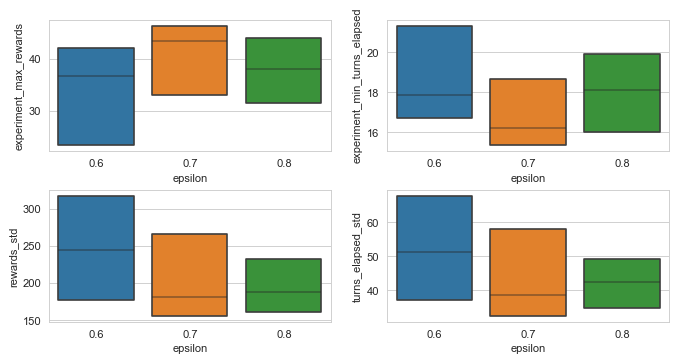

In [89]:
fig = plt.figure(figsize=(10, 5), dpi=80)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.3)

# Hiding outliers as they were crushing our figures
ax1 = fig.add_subplot(2, 2, 1)
sns.boxenplot(data=results_df, x="epsilon", y="experiment_max_rewards", showfliers=False);

ax2 = fig.add_subplot(2, 2, 2)
sns.boxenplot(data=results_df, x="epsilon", y="experiment_min_turns_elapsed", showfliers=False);

ax3 = fig.add_subplot(2, 2, 3)
sns.boxenplot(data=results_df, x="epsilon", y="rewards_std", showfliers=False);

ax4 = fig.add_subplot(2, 2, 4)
sns.boxenplot(data=results_df, x="epsilon", y="turns_elapsed_std", showfliers=False);

# Epsilon 0.7 scored very well in range and variance, in the given range.

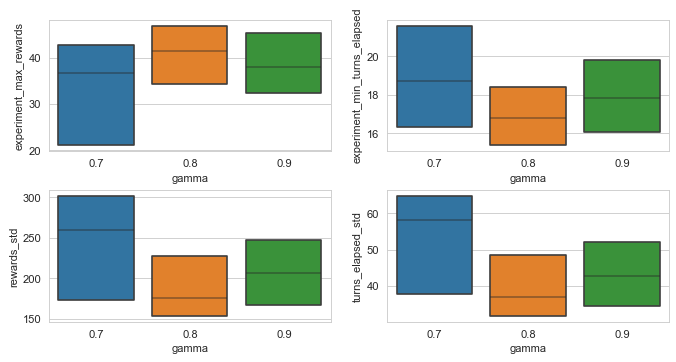

In [90]:
fig = plt.figure(figsize=(10, 5), dpi=80)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.3)

# Hiding outliers as they were crushing our figures
ax1 = fig.add_subplot(2, 2, 1)
sns.boxenplot(data=results_df, x="gamma", y="experiment_max_rewards", showfliers=False);

ax2 = fig.add_subplot(2, 2, 2)
sns.boxenplot(data=results_df, x="gamma", y="experiment_min_turns_elapsed", showfliers=False);

ax3 = fig.add_subplot(2, 2, 3)
sns.boxenplot(data=results_df, x="gamma", y="rewards_std", showfliers=False);

ax4 = fig.add_subplot(2, 2, 4)
sns.boxenplot(data=results_df, x="gamma", y="turns_elapsed_std", showfliers=False);

# Gamma 0.8 performed best in terms of range and variance and std.

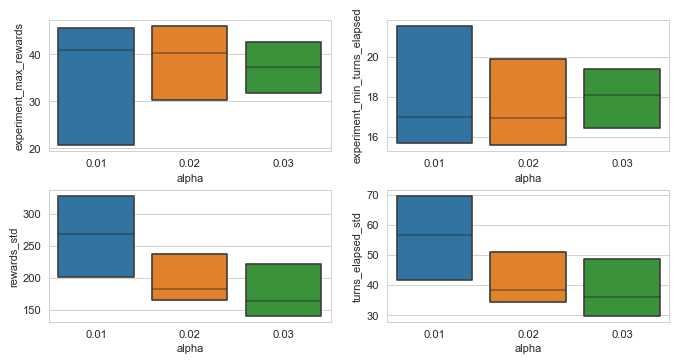

In [91]:
fig = plt.figure(figsize=(10, 5), dpi=80)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.3)

# Hiding outliers as they were crushing our figures
ax1 = fig.add_subplot(2, 2, 1)
sns.boxenplot(data=results_df, x="alpha", y="experiment_max_rewards", showfliers=False);

ax2 = fig.add_subplot(2, 2, 2)
sns.boxenplot(data=results_df, x="alpha", y="experiment_min_turns_elapsed", showfliers=False);

ax3 = fig.add_subplot(2, 2, 3)
sns.boxenplot(data=results_df, x="alpha", y="rewards_std", showfliers=False);

ax4 = fig.add_subplot(2, 2, 4)
sns.boxenplot(data=results_df, x="alpha", y="turns_elapsed_std", showfliers=False);

# Alpha 0.02 performed best in the given range but not by much - best std.

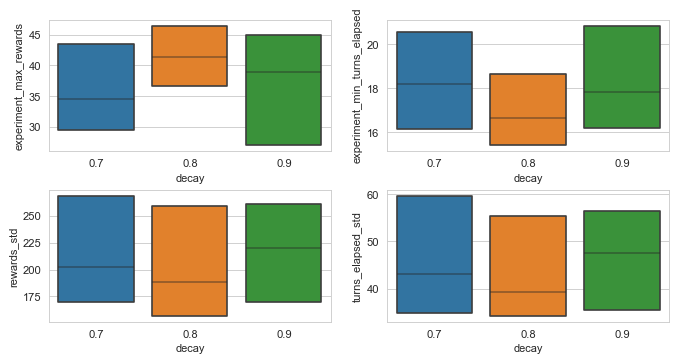

In [92]:
fig = plt.figure(figsize=(10, 5), dpi=80)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.3)

# Hiding outliers as they were crushing our figures
ax1 = fig.add_subplot(2, 2, 1)
sns.boxenplot(data=results_df, x="decay", y="experiment_max_rewards", showfliers=False);

ax2 = fig.add_subplot(2, 2, 2)
sns.boxenplot(data=results_df, x="decay", y="experiment_min_turns_elapsed", showfliers=False);

ax3 = fig.add_subplot(2, 2, 3)
sns.boxenplot(data=results_df, x="decay", y="rewards_std", showfliers=False);

ax4 = fig.add_subplot(2, 2, 4)
sns.boxenplot(data=results_df, x="decay", y="turns_elapsed_std", showfliers=False);

# Decay of 0.8 performed well on the given range - range and variance by far. In terms for std they're all terrible.

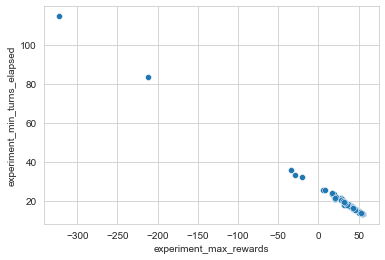

In [55]:
sns.scatterplot(data=results_df, x="experiment_max_rewards", y="experiment_min_turns_elapsed");

In [93]:
results_df.sort_values(by=["experiment_max_rewards"], ascending=False).head(10)

,env_size,epsilon,decay,gamma,alpha,experiment_mean_rewards,experiment_max_rewards,experiment_mean_turns_elapsed,experiment_min_turns_elapsed,rewards_std,turns_elapsed_std
51,10,0.7,0.7,0.7,0.01,"[-582.71, -126.55, 19.21, 4.62, 31.61, 43.08, ...",55.92,"[148.92, 54.03, 21.82, 24.47, 18.35, 15.75, 13...",13.46,180.884241,38.485203
66,10,0.8,0.8,0.8,0.01,"[-461.47, -209.79, -58.6, -1.11, -13.03, 50.47...",54.61,"[119.77, 69.27, 37.68, 25.74, 29.19, 14.27, 13...",13.64,153.079707,31.583326
48,10,0.7,0.7,0.8,0.01,"[-531.03, -194.67, -105.84, -6.27, 21.55, 27.0...",54.15,"[134.52, 64.59, 46.88, 24.63, 20.01, 19.07, 16...",13.53,169.175836,35.044173
31,10,0.7,0.9,0.8,0.02,"[-683.54, -146.4, 34.24, 39.44, 45.33, 49.2, 5...",53.68,"[173.57, 57.96, 17.73, 16.55, 15.93, 14.76, 14...",13.64,212.127398,46.031342
70,10,0.8,0.8,0.7,0.02,"[-503.47, -58.6, -41.6, 30.54, 48.56, 48.84, 4...",53.58,"[136.19, 39.62, 35.35, 19.93, 15.11, 15.07, 15...",14.07,156.572886,34.325764
79,10,0.8,0.7,0.7,0.02,"[-666.77, -90.56, -22.14, 35.17, 15.04, 22.55,...",53.37,"[177.64, 50.32, 34.34, 18.74, 24.3, 22.58, 14....",13.94,201.946020,45.826538
75,10,0.8,0.7,0.8,0.01,"[-575.47, -127.63, -44.26, 1.7, 28.16, 22.95, ...",51.47,"[146.61, 50.73, 32.62, 23.95, 18.92, 19.35, 16...",14.51,176.046287,37.129649
63,10,0.8,0.8,0.9,0.01,"[-592.05, -268.07, -87.02, -46.42, -20.09, 34....",50.63,"[147.79, 80.25, 41.88, 33.36, 28.44, 16.97, 17...",13.86,188.148701,39.210815
40,10,0.7,0.8,0.8,0.02,"[-509.84, -74.63, 12.83, 3.6, 28.17, 37.75, 43...",50.27,"[132.2, 40.0, 22.62, 25.4, 19.38, 17.7, 16.91,...",14.67,157.372772,32.896906
32,10,0.7,0.9,0.8,0.03,"[-431.17, -16.62, 34.54, 43.91, 44.44, 45.84, ...",50.21,"[117.53, 29.87, 18.5, 16.33, 16.16, 16.04, 14....",14.89,136.027291,28.984347


In [94]:
results_df.sort_values(by=["experiment_min_turns_elapsed"], ascending=True).head(10)

,env_size,epsilon,decay,gamma,alpha,experiment_mean_rewards,experiment_max_rewards,experiment_mean_turns_elapsed,experiment_min_turns_elapsed,rewards_std,turns_elapsed_std
51,10,0.7,0.7,0.7,0.01,"[-582.71, -126.55, 19.21, 4.62, 31.61, 43.08, ...",55.92,"[148.92, 54.03, 21.82, 24.47, 18.35, 15.75, 13...",13.46,180.884241,38.485203
48,10,0.7,0.7,0.8,0.01,"[-531.03, -194.67, -105.84, -6.27, 21.55, 27.0...",54.15,"[134.52, 64.59, 46.88, 24.63, 20.01, 19.07, 16...",13.53,169.175836,35.044173
31,10,0.7,0.9,0.8,0.02,"[-683.54, -146.4, 34.24, 39.44, 45.33, 49.2, 5...",53.68,"[173.57, 57.96, 17.73, 16.55, 15.93, 14.76, 14...",13.64,212.127398,46.031342
66,10,0.8,0.8,0.8,0.01,"[-461.47, -209.79, -58.6, -1.11, -13.03, 50.47...",54.61,"[119.77, 69.27, 37.68, 25.74, 29.19, 14.27, 13...",13.64,153.079707,31.583326
63,10,0.8,0.8,0.9,0.01,"[-592.05, -268.07, -87.02, -46.42, -20.09, 34....",50.63,"[147.79, 80.25, 41.88, 33.36, 28.44, 16.97, 17...",13.86,188.148701,39.210815
79,10,0.8,0.7,0.7,0.02,"[-666.77, -90.56, -22.14, 35.17, 15.04, 22.55,...",53.37,"[177.64, 50.32, 34.34, 18.74, 24.3, 22.58, 14....",13.94,201.946020,45.826538
70,10,0.8,0.8,0.7,0.02,"[-503.47, -58.6, -41.6, 30.54, 48.56, 48.84, 4...",53.58,"[136.19, 39.62, 35.35, 19.93, 15.11, 15.07, 15...",14.07,156.572886,34.325764
75,10,0.8,0.7,0.8,0.01,"[-575.47, -127.63, -44.26, 1.7, 28.16, 22.95, ...",51.47,"[146.61, 50.73, 32.62, 23.95, 18.92, 19.35, 16...",14.51,176.046287,37.129649
40,10,0.7,0.8,0.8,0.02,"[-509.84, -74.63, 12.83, 3.6, 28.17, 37.75, 43...",50.27,"[132.2, 40.0, 22.62, 25.4, 19.38, 17.7, 16.91,...",14.67,157.372772,32.896906
10,10,0.6,0.8,0.9,0.02,"[-539.15, -124.95, -84.27, 40.18, -33.12, 46.8...",47.49,"[135.82, 50.5, 43.96, 16.54, 33.77, 15.27, 19....",14.88,166.948970,34.349021


The hyperparameters:
- epsilon: 0.7
- decay: 0.8
- gamma: 0.8
- alpha: 0.01

Performed the best with max reward of 55.92 and min turns taken at 13.46. Let's use these hyperparameters for other environment sizes.
